<a href="https://colab.research.google.com/github/Chabachib/GoogleColab-Notebooks/blob/main/Filtrage_Lineaire_Non_Lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

## Original Image

In [2]:
original_image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

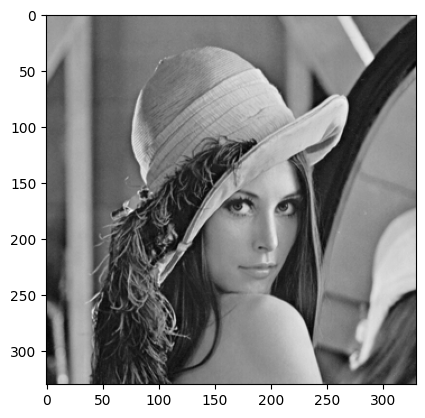

In [3]:
plt.imshow(original_image, cmap='gray')
plt.show()

## Salt and Pepper Function

In [4]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

## Gaussian Noise Function

In [5]:
def gaussian_noise(image, mean, var):
    image = image.astype(np.float32)
    sigma = var ** 0.5
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

## Comparaison : Original vs SP Noise vs Gaussian Noise

In [17]:
sp_noise = sp_noise(original_image, 0.03)

In [7]:
gaussian_noise = gaussian_noise(original_image,0,500)

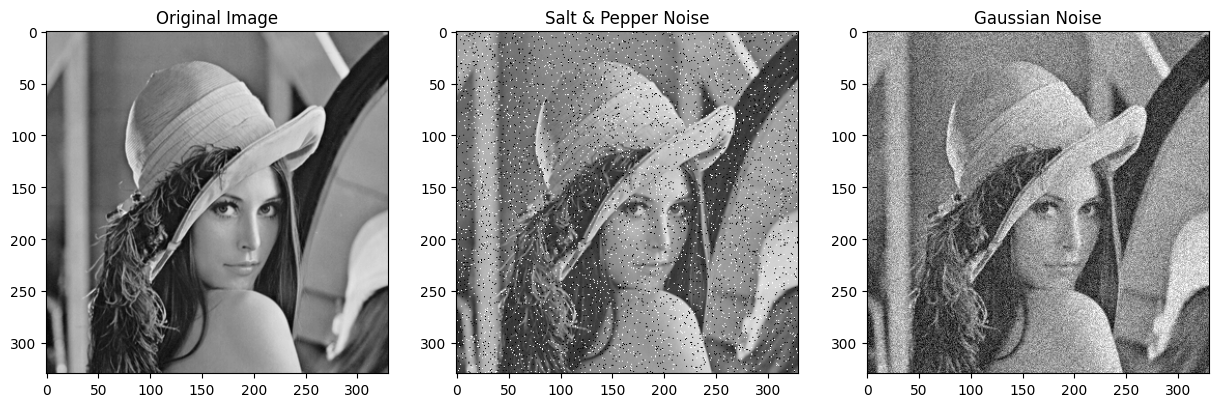

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sp_noise, cmap='gray')
plt.title('Salt & Pepper Noise')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_noise, cmap='gray')
plt.title('Gaussian Noise')

plt.show()


## Median Filter Function (Non Linear Filter)

In [11]:
def median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

## Mean Filter Function (Linear Filter)

In [12]:
def mean_filter(image, kernel_size):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

## Comparaison : Gaussian Noise vs Median vs Mean

In [14]:
mean_gaussian_noise_img = mean_filter(gaussian_noise, 5)
median_gaussian_noise_img = median_filter(gaussian_noise, 5)

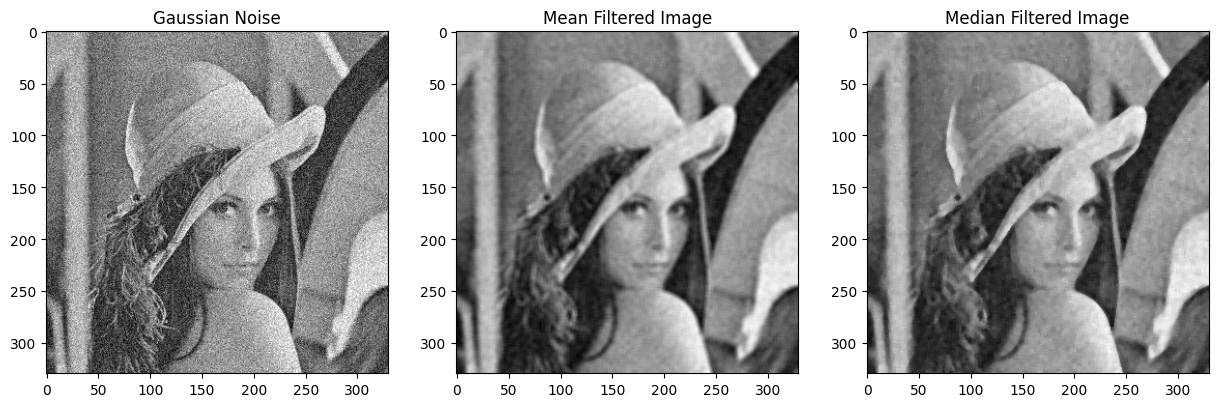

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gaussian_noise, cmap='gray')
plt.title('Gaussian Noise')

plt.subplot(1, 3, 2)
plt.imshow(mean_gaussian_noise_img, cmap='gray')
plt.title('Mean Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(median_gaussian_noise_img, cmap='gray')
plt.title('Median Filtered Image')

plt.show()

## Comparaison : SP Noise vs Median vs Mean

In [19]:
mean_sp_noise_img = mean_filter(sp_noise, 5)
median_sp_noise_img = median_filter(sp_noise, 5)

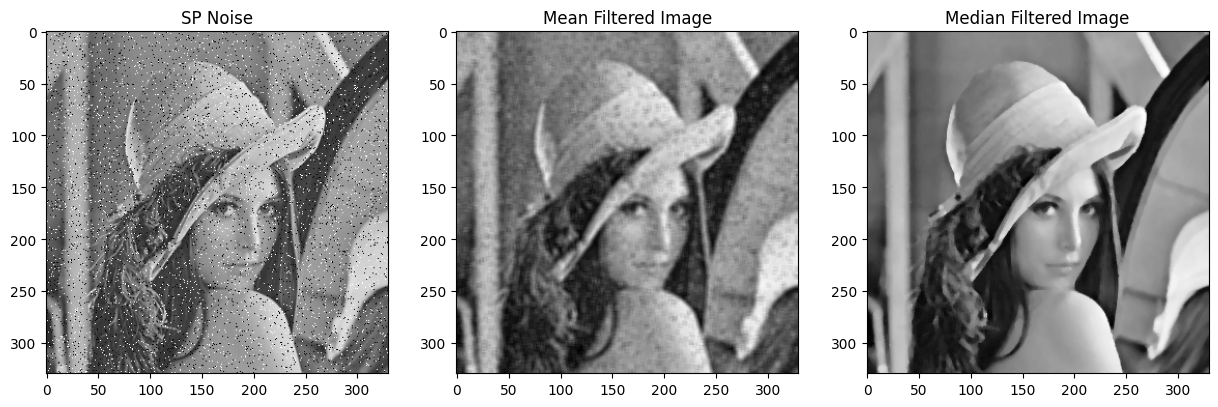

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(sp_noise, cmap='gray')
plt.title('SP Noise')

plt.subplot(1,3,2)
plt.imshow(mean_sp_noise_img, cmap='gray')
plt.title('Mean Filtered Image')

plt.subplot(1,3,3)
plt.imshow(median_sp_noise_img, cmap='gray')
plt.title('Median Filtered Image')

plt.show()

## Median Filter Function From Scratch

In [28]:
def median_filter_from_scratch(image, kernel_size):
    image = np.pad(image, kernel_size // 2, mode='constant')
    output_image = np.zeros_like(image)
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        neighborhood = image[i:i+kernel_size, j:j+kernel_size]
        median_value = np.median(neighborhood)
        output_image[i, j] = median_value

    return output_image

In [24]:
median_test_1 = median_filter_from_scratch(sp_noise, 5)
median_test_2 = median_filter(sp_noise, 5)

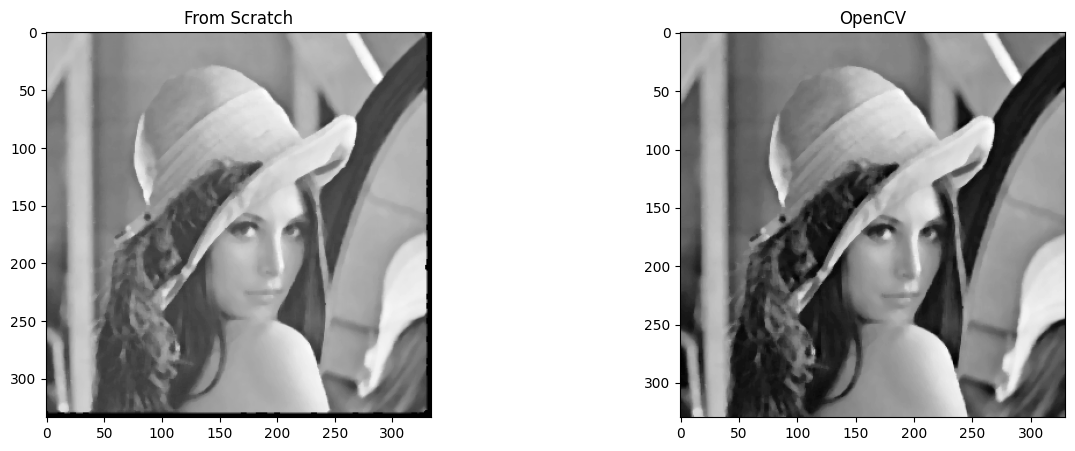

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.imshow(median_test_1, cmap='gray')
plt.title('From Scratch')

plt.subplot(1,2,2)
plt.imshow(median_test_2, cmap='gray')
plt.title('OpenCV')

plt.show()

## Mean Filter Function From Scratch

In [29]:
def mean_filter_from_scratch(image, kernel_size):
  pad_size = kernel_size // 2
  padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
  output_image = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
      mean_value = np.mean(neighborhood)
      output_image[i, j] = mean_value
  return output_image

In [31]:
mean_test_1 = mean_filter_from_scratch(sp_noise, 5)
mean_test_2 = mean_filter(sp_noise, 5)

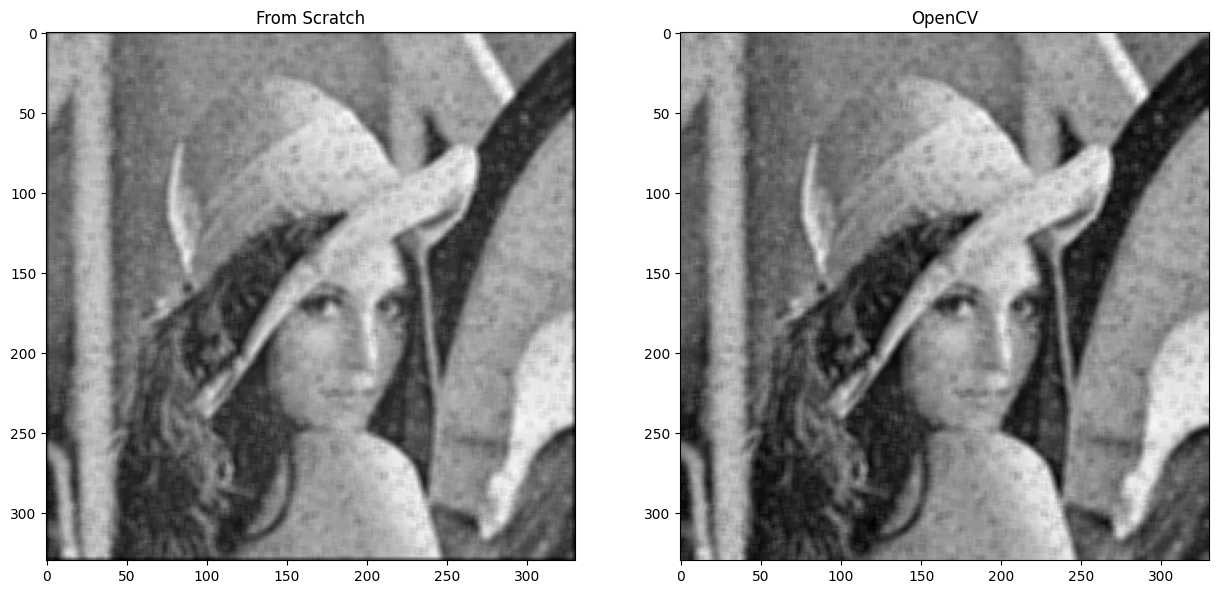

In [32]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(mean_test_1, cmap='gray')
plt.title('From Scratch')

plt.subplot(1,2,2)
plt.imshow(mean_test_2, cmap='gray')
plt.title('OpenCV')

plt.show()